In [26]:
import numpy as np
import matplotlib.pyplot as plt
import copy

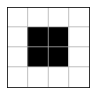

In [85]:
size = 4

init = np.zeros(shape = (size,size))

init[1:size-1, 1:size-1] = 1

init = init.astype(int)

fig = plt.figure(figsize=[5,5])

ax = plt.subplot(3,3,1)

plt.pcolor(init, cmap = 'Greys')

plt.grid(snap = 0)

plt.xticks([1,2,3])
plt.yticks([1,2,3])

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show();

In [86]:
init[1,1]

1

## define number of neighbours

In [103]:
Nn = np.zeros(shape = (size,size))

for i in range(size):

    for j in range(size):

        I = i
        J = j
        
#         print(i,j)
        
        if i == size-1:
            I = I-1
            
        if j == size-1:
            J = j-1
            
        Nn[i,j] = np.sum( [
            init[I-1, J-1], 
            init[I, J-1], 
            init[I+1, J-1],
            init[I-1, J],
            init[I+1, J],
            init[I-1, J+1],
            init[I, J+1],
            init[I+1, J+1]                    
        ])
        
print(Nn)

[[1. 2. 2. 2.]
 [2. 3. 3. 3.]
 [2. 3. 3. 3.]
 [2. 3. 3. 3.]]
